In [2]:
from tensorflow import keras
from tensorflow.keras import layers

#Can build a model two ways. Either by calling the model or building it incrementally

#Call model
model = keras.Sequential([layers.Dense(64, activation = "relu"),
                         layers.Dense(10, activation = "softmax")
                         ])


In [4]:
#Build model incrementally - these are equivalent
model = keras.Sequential()
model.add(layers.Dense(64, activation = "relu"))
model.add(layers.Dense(10, activation = "softmax"))
#However it does not have any weights unitl you call the build function
model.build(input_shape = (None, 3))
model.weights
#Now the model expects samples of shape (3,) where None indicated that the batch size could be anything

[<tf.Variable 'dense_6/kernel:0' shape=(3, 64) dtype=float32, numpy=
 array([[-0.28506237, -0.23297027,  0.01497746, -0.26703653,  0.13593277,
         -0.10515498, -0.28276533, -0.14928101, -0.00583535,  0.17064166,
          0.29534596, -0.12115157,  0.2109999 , -0.15897106, -0.03347385,
         -0.08763362,  0.2686414 , -0.27470708, -0.13745447, -0.18214199,
          0.17653087,  0.21565115, -0.25642985, -0.23058519, -0.00032878,
          0.07611236,  0.13333187,  0.2756433 ,  0.07663348,  0.24783015,
         -0.05329724,  0.16841662, -0.00095856, -0.25447145,  0.03814861,
          0.00667349,  0.11731943,  0.0260936 ,  0.07198021, -0.14284234,
         -0.03221244,  0.07890242, -0.2349152 , -0.28132442, -0.05373146,
         -0.230812  ,  0.24572045, -0.12761344,  0.03106394, -0.2466868 ,
         -0.16670127, -0.15189733,  0.24619353,  0.21693808,  0.01848185,
          0.18113828,  0.10281971,  0.00801766, -0.26555407, -0.2645883 ,
          0.21138   , -0.21002735,  0.23362

In [5]:
#Display model contents
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                256       
_________________________________________________________________
dense_7 (Dense)              (None, 10)                650       
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


In [7]:
#Models and layers can be named
model = keras.Sequential(name = "Example Model")
model.add(layers.Dense(64, activation = "relu", name = "First_Layer"))
model.add(layers.Dense(10, activation = "softmax", name = "Last_Layer"))
model.build((None, 3))
model.summary()

Model: "Example Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
First_Layer (Dense)          (None, 64)                256       
_________________________________________________________________
Last_Layer (Dense)           (None, 10)                650       
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


In [11]:
#Rather than calling the build function everytime to declare input shape you can use the Input class
model = keras.Sequential()
#in this case the shape argument must be the shape of each sample, not the shape of one batch.
#i.e. keras does not care about the sample size, sample feature size is whats being considered.
model.add(keras.Input(shape=(3,)))
model.add(layers.Dense(64, activation = "relu"))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 64)                256       
Total params: 256
Trainable params: 256
Non-trainable params: 0
_________________________________________________________________


In [13]:
#simple functional model with two dense layers
#inputs hold information about shape/dtype model will process - called symbolic tensor
inputs = keras.Input(shape=(3,), name = "my_input")
print("Input shape: ",inputs.shape)
print("Inputs dtype: ", inputs.dtype)
#Create a layer and called it on input
#All layers can be called on both real tensors of data and symbolic tensors with layers updating shape/dtype when called on symbolic tensors
features = layers.Dense(64, activation = "relu")(inputs)
print("Features Shape: ", features.shape)
outputs = layers.Dense(10, activation = "softmax")(features)
#started model by specifying inputs/outputs
model = keras.Model(inputs = inputs, outputs = outputs)

Input shape:  (None, 3)
Inputs dtype:  <dtype: 'float32'>
Features Shape:  (None, 64)


In [14]:
#Rank customer support tickets by priority and route to appropriate department.
#Ticket contains: title, text body, tags added by user (categorical input)
#Model would have two outputs - priority score of ticket (scaler between 0/1) and department that should handle it (softmax)
vocab_size = 10000
num_tags = 100
num_departments = 4
title = keras.Input(shape=(vocab_size,), name = "title")
text_body = keras.Input(shape=(vocab_size,), name = "text_body")
tags = keras.Input(shape = (num_tags,), name = "tags")
#Combine inputs into a single tensor (features) by concatenating
features = layers.Concatenate()([title, text_body, tags])
#Intermediate later to recombine input features into richer representations 
features = layers.Dense(64, activation = "relu")(features)
#Next two lines define the model output
priority = layers.Dense(1, activation = "sigmoid", name = "priority")(features)
department = layers.Dense(num_departments, activation = "softmax", name = "department")(features)
#Create model by specifiying inputs and outputs
model = keras.Model(inputs = [title, text_body, tags], outputs = [priority, department])

In [16]:
#create dummy input/target data
import numpy as np
num_samples = 1280

title_data = np.random.randint(0, 2, size = (num_samples, vocab_size))
text_body_data = np.random.randint(0, 2, size = (num_samples, vocab_size))
tags_data = np.random.randint(0, 2, size = (num_samples, num_tags))

priority_data = np.random.random(size = (num_samples, 1))
department_data = np.random.randint(0, 2, size = (num_samples, num_departments))

model.compile(optimizer = "rmsprop", loss = ["mean_squared_error", "categorical_crossentropy"],
              metrics = [["mean_absolute_error"], ["accuracy"]]) 
model.fit([title_data, text_body_data, tags_data], 
         [priority_data, department_data],
         epochs=1)
model.evaluate([title_data, text_body_data, tags_data],
              [priority_data, department_data])
priority_preds, department_preds = model.predict([title_data, text_body_data, tags_data])

40/40 [==============================] - 0s 4ms/step - loss: 28.6573 - priority_loss: 0.3251 - department_loss: 28.3321 - priority_mean_absolute_error: 0.4875 - department_accuracy: 0.1203


In [17]:
#Can also train model using a dictionary input based on the names of input objects.
#Useful for when you dont want to rely on input order.
model.compile(optimizer="rmsprop",
              loss={"priority": "mean_squared_error", "department":
                    "categorical_crossentropy"},
              metrics={"priority": ["mean_absolute_error"], "department":
                       ["accuracy"]})
model.fit({"title": title_data, "text_body": text_body_data,
           "tags": tags_data},
          {"priority": priority_data, "department": department_data},
          epochs=1)
model.evaluate({"title": title_data, "text_body": text_body_data,
                "tags": tags_data},
               {"priority": priority_data, "department": department_data})
priority_preds, department_preds = model.predict(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data})

40/40 [==============================] - 0s 3ms/step - loss: 52.2257 - priority_loss: 0.3251 - department_loss: 51.9006 - priority_mean_absolute_error: 0.4875 - department_accuracy: 0.0617


In [37]:
#Bugged and not working right now...

#keras.utils.plot_model(model, "ticket_classifier.png",  show_shapes=True, show_layer_names=True)

In [33]:
#keras.utils.plot_model(model, "ticket_classifier_with_shape_info.png", show_shapes = True)

In [42]:
#Allows inspection/reuse of indiv layers
model.layers

In [51]:
model.layers[4]

In [46]:
model.layers[3].input

[<KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'title')>,
 <KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'text_body')>,
 <KerasTensor: shape=(None, 100) dtype=float32 (created by layer 'tags')>]

In [44]:
#These commands allow for feature extraction - creating models that reuse intermediate features from another model.
model.layers[3].output

<KerasTensor: shape=(None, 20100) dtype=float32 (created by layer 'concatenate')>

In [48]:
#Create model reusing intermediate layer outputs
#add another classification layer that takes into account how quick the ticket would take to resolve
features = model.layers[4].output
#this is the layer after the concatenated one that recombines all the input features 
print(features)
#difficulty == how long to complete ticket
difficulty = layers.Dense(3, activation = "softmax", name = "difficulty")(features)

new_model = keras.Model(inputs = [title, text_body, tags],
                       outputs = [priority, department, difficulty])

KerasTensor(type_spec=TensorSpec(shape=(None, 64), dtype=tf.float32, name=None), name='dense_15/Relu:0', description="created by layer 'dense_15'")


In [52]:
#On top of being able to subclass individual layers, models can also be subclassed
class CustomerTicketModel(keras.Model):
  
    def __init__(self, num_departments):
        #calls the super constructor
        super().__init__()
        #Defines the sublayers in the constructor
        self.concat_layer = layers.Concatenate()                     
        self.mixing_layer = layers.Dense(64, activation="relu")      
        self.priority_scorer = layers.Dense(1, activation="sigmoid") 
        self.department_classifier = layers.Dense(                   
            num_departments, activation="softmax")
    #Defines the forward pass in the call method
    def call(self, inputs):                                          
        title = inputs["title"]
        text_body = inputs["text_body"]
        tags = inputs["tags"]
  
        features = self.concat_layer([title, text_body, tags])
        features = self.mixing_layer(features)
        priority = self.priority_scorer(features)
        department = self.department_classifier(features)
        return priority, department

In [53]:
#Like the layer subclassing method this will only define the weights the first time it is called on data
model = CustomerTicketModel(num_departments = 4)

priority, department = model({"title": title_data, "text_body": text_body_data, "tags": tags_data})

In [55]:
#the structure of loss/metrics must match what gets returned by call() i.e. list of two elements
model.compile(optimizer = "rmsprop", loss = ["mean_squared_error", "categorical_crossentropy"],
              metrics = [["mean_absolute_error"], ["accuracy"]])
#structure of input data must match what is expected by the call() method i.e. dict w/ keys title, txtbody, tags
model.fit({"title": title_data,
          "text_body": text_body_data,
          "tags": tags_data},
        #Structure of target data much match what is returned by the call(). i.e. list of two elements
         [priority_data, department_data],
         epochs=1)
model.evaluate({"title": title_data,
               "text_body": text_body_data,
               "tags": tags_data},
              [priority_data, department_data])
priority_preds, department_preds = model.predict({"title": title_data,
                                                 "text_body": text_body_data,
                                                 "tags": tags_data})
#Subclassing allows more flexability for example a for loop inside the call() method to go through the layers

40/40 [==============================] - 0s 6ms/step - loss: 39.4919 - output_1_loss: 0.3251 - output_2_loss: 39.1668 - output_1_mean_absolute_error: 0.4875 - output_2_accuracy: 0.1203


In [56]:
#Keras allows subclassed models/layers to work with functional models
class Classifier(keras.Model):
    def __init__(self, num_classes=2):
        super().__init__()
        if num_classes == 2:
            num_units = 1
            activation = "sigmoid"
        else:
            num_units = num_classes
            activation = "softmax"
        self.dense = layers.Dense(num_units, activation = activation)
    
    def call(self, inputs):
        return self.dense(inputs)

inputs = keras.Input(shape=(3,))
features = layers.Dense(64, activation = "relu")(inputs)
outputs = Classifier(num_classes = 10)(features)
model = keras.Model(inputs = inputs, outputs = outputs)

In [57]:
#or inversly use a functional model as part of a subclassed layer/model
inputs = keras.Input(shape=(64,))
outputs = layers.Dense(1, activation = "sigmoid")(inputs)
binary_classifier = keras.Model(inputs = inputs, outputs = outputs)

class MyModel(keras.Model):
    def __init__(self, num_classes = 2):
        super().__init__()
        self.dense = layers.Dense(64, activation = "relu")
        self.classifier = binary_classifier
    def call(self, inputs):
        features = self.dense(inputs)
        return self.classifier(features)
    
model = MyModel()

In [59]:
#You can write your own metrics using subclassing. But the varaibles are not updated during backpropogation
#so the state update logic has to be written yourself. 
import tensorflow as tf
#subclass metrics class
class RootMeanSquaredError(keras.metrics.Metric):
    #define the state variables in constructor and access add_weight() method
    def __init__(self, name="rmse", **kwargs):
        super().__init__(name=name, **kwargs)
        self.mse_sum = self.add_weight(name="mse_sum", initializer="zeros")
        self.total_samples = self.add_weight(name = "total_samples", initializer = "zeros", dtype = "int32")
    #implement update state logic. y_true is the targets/labels for one batch
    #y_pred is the predictions from the model.
    #sample weight can be ignored.
    def update_state(self, y_true, y_pred, sample_weight=None):
        #make categorical pred/labels to match model
        y_true = tf.one_hot(y_true, depth = tf.shape(y_pred)[1])
        mse = tf.reduce_sum(tf.square(y_true - y_pred))
        self.mse_sum.assign_add(mse)
        num_samples = tf.shape(y_pred)[0]
        self.total_samples.assign_add(num_samples)
        
#use result() method to return current val of metric
    def result(self):
        return tf.sqrt(self.mse_sum / tf.cast(self.total_samples, tf.float32))
#Need to reset metric state w/o reinstantiating it so can be used w/ diff epochs of training or both train/eval
    def reset_state(self):
        self.mse_sum.assign(0.)
        self.total_samples.assign(0)
#This class can be called when you are compiling your model in the metrics section of the list. 
#i.e. metrics = ["accuracy", RootMeanSquaredError()]

In [61]:
#Test model
from tensorflow.keras.datasets import mnist
  
def get_mnist_model():                                                
    inputs = keras.Input(shape=(28 * 28,))
    features = layers.Dense(512, activation="relu")(inputs)
    features = layers.Dropout(0.5)(features)
    outputs = layers.Dense(10, activation="softmax")(features)
    model = keras.Model(inputs, outputs)
    return model
  
(images, labels), (test_images, test_labels) = mnist.load_data()      
images = images.reshape((60000, 28 * 28)).astype("float32") / 255 
test_images = test_images.reshape((10000, 28 * 28)).astype("float32") / 255 
train_images, val_images = images[10000:], images[:10000]
train_labels, val_labels = labels[10000:], labels[:10000]
  
model = get_mnist_model()
model.compile(optimizer="rmsprop",                                    
              loss="sparse_categorical_crossentropy",                 
              metrics=["accuracy"])                                   
model.fit(train_images, train_labels,                                 
          epochs=3,                                                   
          validation_data=(val_images, val_labels))                   
test_metrics = model.evaluate(test_images, test_labels)               
predictions = model.predict(test_images) 

Epoch 1/3
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2913 - accuracy: 0.9127 - val_loss: 0.1573 - val_accuracy: 0.9523
Epoch 2/3
1563/1563 [==============================] - 4s 2ms/step - loss: 0.1640 - accuracy: 0.9540 - val_loss: 0.1298 - val_accuracy: 0.9650
Epoch 3/3
313/313 [==============================] - 0s 1ms/step - loss: 0.1073 - accuracy: 0.9721


## Callback

In [64]:
#callback - an object thats is passed to the model in the call to fit()
#and called by the model at various points during training. It has info on state of model/performance
#and can be used to save, interrupt, load a different weight set, or otherwise alter the state of the model
#can be used to checkpoint during training, early stopping, dynamically adjust the value of certain parameters during training,
#like learning rate, logging training/validation metrics during training and visualize the representations learned by the model as they are updated.

#use early stop and checkpoint call backs
#callbacks are passed to the model vias the callbacks arg in fit() which takes a list.
callbacks_list = [keras.callbacks.EarlyStopping(
                monitor = "val_accuracy", patience = 2),
                #saves current weights after each epoch
                 keras.callbacks.ModelCheckpoint(
                 filepath = "checkpoint_path.keras",
                 monitor = "val_loss",
                #wont overwrite file unless their is an improvement
                 save_best_only = True)]
model = get_mnist_model()
model.compile(optimizer = "rmsprop",
             loss = "sparse_categorical_crossentropy",
             metrics = ["accuracy"])
model.fit(train_images, train_labels,
         epochs = 10, callbacks = callbacks_list,
         validation_data = (val_images, val_labels))

#models can be saved manually using model.save('my_checkpoint_path')
#to reload - model = keras.models.load_model("checkpoint_path.keras")

Epoch 1/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2913 - accuracy: 0.9153 - val_loss: 0.1516 - val_accuracy: 0.9563
Epoch 2/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1641 - accuracy: 0.9539 - val_loss: 0.1235 - val_accuracy: 0.9664
Epoch 3/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1387 - accuracy: 0.9626 - val_loss: 0.1136 - val_accuracy: 0.9718
Epoch 4/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1248 - accuracy: 0.9676 - val_loss: 0.1169 - val_accuracy: 0.9717
Epoch 5/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1159 - accuracy: 0.9698 - val_loss: 0.0973 - val_accuracy: 0.9769
Epoch 6/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1110 - accuracy: 0.9725 - val_loss: 0.1082 - val_accuracy: 0.9768
Epoch 7/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1037 - accuracy: 0.9750 - val_loss: 0.1071 - val_accuracy:

## Custom Callbacks

Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.2969 - accuracy: 0.9114 - val_loss: 0.1521 - val_accuracy: 0.9560
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1658 - accuracy: 0.9527 - val_loss: 0.1273 - val_accuracy: 0.9678
Epoch 3/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1363 - accuracy: 0.9629 - val_loss: 0.1098 - val_accuracy: 0.9729
Epoch 4/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1242 - accuracy: 0.9681 - val_loss: 0.1038 - val_accuracy: 0.9747
Epoch 5/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1178 - accuracy: 0.9711 - val_loss: 0.1106 - val_accuracy: 0.9731
Epoch 6/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1115 - accuracy: 0.9727 - val_loss: 0.1037 - val_accuracy: 0.9756
Epoch 7/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1067 - accuracy: 0.9739 - val_loss: 0.1102 - val_accuracy:

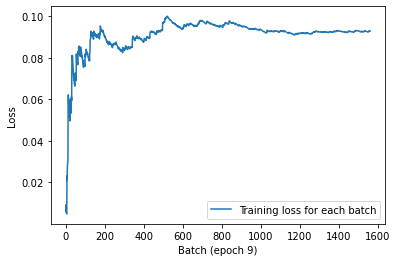

In [65]:
#implemented by subclassing keras.callbacks.Callback

#Create a loss history graph per batch

from matplotlib import pyplot as plt
  
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs):
        self.per_batch_losses = []
  
    def on_batch_end(self, batch, logs):
        self.per_batch_losses.append(logs.get("loss"))
  
    def on_epoch_end(self, epoch, logs):
        plt.clf()
        plt.plot(range(len(self.per_batch_losses)), self.per_batch_losses,
                 label="Training loss for each batch")
        plt.xlabel(f"Batch (epoch {epoch})")
        plt.ylabel("Loss")
        plt.legend()
        plt.savefig(f"plot_at_epoch_{epoch}")
        self.per_batch_losses = []
        
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          callbacks=[LossHistory()],
          validation_data=(val_images, val_labels))

## Tensorboard

In [71]:
#Example of how tensorboard is used
import time
NAME = "TensorLogs-{}".format(int(time.time()))

model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
  
tensorboard = keras.callbacks.TensorBoard(
    log_dir="C:/Users/joshu/Documents/TensorFlow Learning Materials/logs/{}".format(NAME),
)
model.fit(train_images, train_labels,
          epochs=10,
          validation_data=(val_images, val_labels),
          callbacks=[tensorboard])

Epoch 1/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2921 - accuracy: 0.9138 - val_loss: 0.1561 - val_accuracy: 0.9563
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1653 - accuracy: 0.9540 - val_loss: 0.1355 - val_accuracy: 0.9656
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1450 - accuracy: 0.9612 - val_loss: 0.1116 - val_accuracy: 0.9711
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1249 - accuracy: 0.9674 - val_loss: 0.1240 - val_accuracy: 0.9718
Epoch 5/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1202 - accuracy: 0.9707 - val_loss: 0.1131 - val_accuracy: 0.9752
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1119 - accuracy: 0.9731 - val_loss: 0.1025 - val_accuracy: 0.9748
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1070 - accuracy: 0.9743 - val_loss: 0.1018 - val_accuracy:

In [75]:
#Apparently there are no files for tensorboard to open which doesnt make sense. At least it shows up...
%load_ext tensorboard
%tensorboard --logdir C:\Users\joshu\Documents\TensorFlow_Learning_Materials\logs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
